In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

一、获取数据集

1、.zip文件，解压到 datasets mlcomp／目录下解压后会在 datasets/ mlcomp一下生成名为 379 的目录，其目录下包目录和一个名为 metadata 的介绍文件。  
2、使用 train 子目录下的文档进行模型训练   
3、使用 test 子目录下的文档进行模型测试    
4、train 子目录下包含20个子目录，每个子目录代表一种文档的类型，子目录下的所有文档都是属于目录名称所标识的文档类型。    
raw原始数据集

二、文档的数学表达

将文档表达为计算机能够理解和处理的信息（自然语言处理的重要课题）     
1、TF-IDF用以评估一个词语对于一份文档的重要程度   
（1）TF 表示词频 ( Term Frequency ），对一份文档而言，词频是特定词语在这篇文档里出现的次数除以文档的词语总数  
（2）IDF 表示一个词的逆向文档频率指数 Clnverse Document Frequency），由总文档数目除以包含该词的文挡的数目，再将得到的商取对数得到，它代表词语的权重指数   
（3）两者相乘，即可得到这个词在文档中的重要程度      
2、利用TF-IDF 工具，把一篇文档转换为一个向量   
（1）从数据集（在自然语言处理领域也称为corpus 语料库）里提取出所有出现的词语，我们称为词典。假设词典里总共有 10 000一个词语，则每个文档都可转化为一个 10000 维的向量。     
 (2)针对要转换的文档里出现的每个词语，都去计算其 TF-IDF的值，并把这个值填入文档向量里这个词所对应的元素上    
 (3)这样就完成把一篇文档转换为向量的过程     
   
上述过程不需要我们自己用代码去完成， scikit-leam 软件包里实现了把文档转换为向量的过程

 

In [24]:
from time import time
from sklearn.datasets import load_files

#把训练用的语料库读入内存
print("loading train dataset ...")
t = time()
news_train = load_files('datasets/mlcomp/379/train')  #sklearn.datasets.load_files
print("summary: {0} documents in {1} categories.".format(
    len(news_train.data), len(news_train.target_names)))
print("done in {0} seconds".format(time() - t))

loading train dataset ...
summary: 13180 documents in 20 categories.
done in 4.332247972488403 seconds


load_files ()函数会从目录里把所有的文档都读入内存，并且自动根据所在的子目录名称打上标签       
  （1）其中，news train.data是一个数组，里面包含了所有文档的文本信息    
  （2）news_train.target 也是一个数组，包含了所有文档所属的类别    
  （3）news_train.target_ names 则是类别的名称   
如果我们想知道第一篇文档所属的类别名称，只需通过代码 news_ train. target_ names[ news_ train. target[O ]］即可得到

In [26]:
#文档全部转换为由 TF-IDF 表达的权重信息构成的向量
from sklearn.feature_extraction.text import TfidfVectorizer
print("vectorizing train dataset ...")
t = time()
vectorizer = TfidfVectorizer(encoding='latin-1')#构建一个计算词频对象
X_train = vectorizer.fit_transform((d for d in news_train.data))
print("n_samples: %d, n_features: %d" % X_train.shape)
print("number of non-zero features in sample [{0}]: {1}".format(
    news_train.filenames[0], X_train[0].getnnz()))#非零特征
print("done in {0} seconds".format(time() - t))

vectorizing train dataset ...
n_samples: 13180, n_features: 130274
number of non-zero features in sample [datasets/mlcomp/379/train\talk.politics.misc\17860-178992]: 108
done in 19.635123014450073 seconds


TfidfVectorizer 类是用来把所有的文档转换为矩阵，矩阵每行都代表一个文档，一行中每个元素代表一个对应词语的重要性，词语重要性用 TF-IDF 来表示  
○其中fit_transform () 方法是fit()和 transform() 合并起来  
○其中 ,fit () 会先完成语料库分析、 提取词典等操作  
○transform() 把对每篇文档转换为向量，最终构成矩阵，保存在X_train 变量里    

词典总共有 130274一个词语，即每篇文档都可转换为130274维的向量   
○第1篇文档 ，只有108个非零元素，即这篇文档总共由108个不重复的单词组成,在这篇文档中出现的这108个单词 TF-IDF 值会被计算出来并保存，存在向量中的指定位置上         
○X_trans是一个维度为 13180 × 130274 的稀疏矩阵  

三、模型训练

In [42]:
from sklearn.naive_bayes import MultinomialNB #多项式分布的朴素贝叶斯算法

print("traning models ...".format(time() - t))
t = time()
y_train = news_train.target
clf = MultinomialNB(alpha=0.0001)  #alph 表示平滑参数，设置alpha=1被称为拉普拉斯平滑，而alpha<1被称为Lidstone平滑。
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print("train score: {0}".format(train_score))
print("done in {0} seconds".format(time() - t))

traning models ...
train score: 0.9978755690440061
done in 0.950054407119751 seconds


In [43]:
#加载测试数据集，测试数据集在 datasets/mlcomp/379/test目录下，用前面介绍的相同的方法先加载数据集
print("loading test dataset ...")
t = time()
news_test = load_files('datasets/mlcomp/379/test')
print("summary: {0} documents in {1} categories.".format(
    len(news_test.data), len(news_test.target_names)))
print("done in {0} seconds".format(time() - t))

loading test dataset ...
summary: 5648 documents in 20 categories.
done in 5.960340738296509 seconds


In [44]:
print("vectorizing test dataset ...")
t = time()
#1.fit_transform()的作用就是先拟合数据，然后转化它将其转化为标准形式，一般应用在训练集中
#2.tranform()的作用是通过找中心和缩放等实现标准化，一般用在测试集中
X_test = vectorizer.transform((d for d in news_test.data))
print("n_samples: %d, n_features: %d" % X_test.shape)
print("number of non-zero features in sample [{0}]: {1}".format(
    news_test.filenames[0], X_test[0].getnnz()))
print("done in %fs" % (time() - t))

vectorizing test dataset ...
n_samples: 5648, n_features: 130274
number of non-zero features in sample [datasets/mlcomp/379/test\rec.autos\7429-103268]: 61
done in 7.387423s


fit_transform()的作用就是先拟合数据，然后转化它将其转化为标准形式，一般应用在训练集中    
tranform()的作用是通过找中心和缩放等实现标准化，一般用在测试集中
![avatar](https://img-blog.csdn.net/20170519094636012)

In [45]:
#用一篇文档检测模型的准确性
pred = clf.predict(X_test[0])
print("predict: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[pred[0]]))
print("actually: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[news_test.target[0]]))

predict: datasets/mlcomp/379/test\rec.autos\7429-103268 is in category rec.autos
actually: datasets/mlcomp/379/test\rec.autos\7429-103268 is in category rec.autos


四、模型评价

In [46]:
#预测测试数据集
print("predicting test dataset ...")
t = time()
pred = clf.predict(X_test)
print("done in %fs" % (time() - t))

predicting test dataset ...
done in 0.129007s


In [48]:
#使用 classification report()函数来查看一下针对每个类别的预测准确性  https://www.jianshu.com/p/ecdcdf2a6f47
from sklearn.metrics import classification_report
print("classification report on test set for classifier:")
print(clf)
print(classification_report(y_test, pred,
                            target_names=news_test.target_names))
#针对每种类别都统计查准率、召回率、Fl-Score 和支持样本数

classification report on test set for classifier:
MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics     

In [49]:
#还可以通过confusion_matrix() 函数生成混淆矩阵，观察每种类别被错误分类的情况。例如，这些被错误分类的文档是被错诞分类到哪些类别里的
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 2

第一行数据中可以看出，类别0（alt.atheism ）的文档有13个被错误地分类到类别19 (talk.religion.misc）里，我们还可以把混淆矩阵进行数据可视化处理。

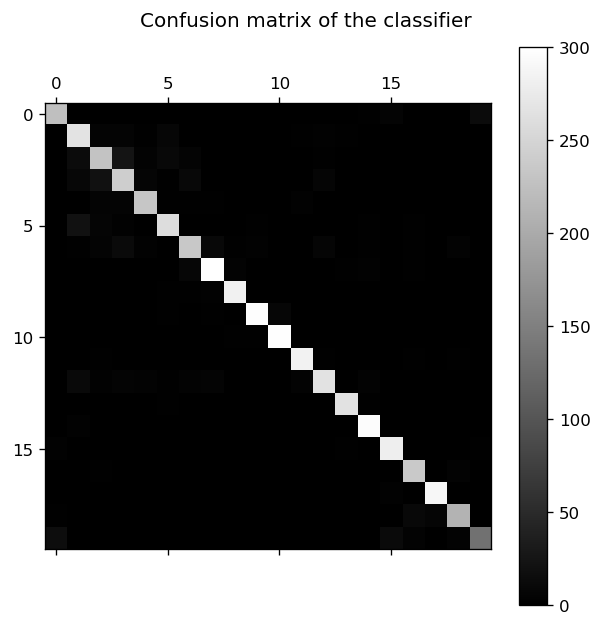

In [63]:
# 可视化混淆矩阵
plt.figure(figsize=(6, 6), dpi=120)
plt.title('Confusion matrix of the classifier')
ax = plt.gca()                                  
ax.spines['right'].set_color('none')            
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none') #获取底部的轴
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm, fignum=1, cmap='gray')
plt.colorbar();

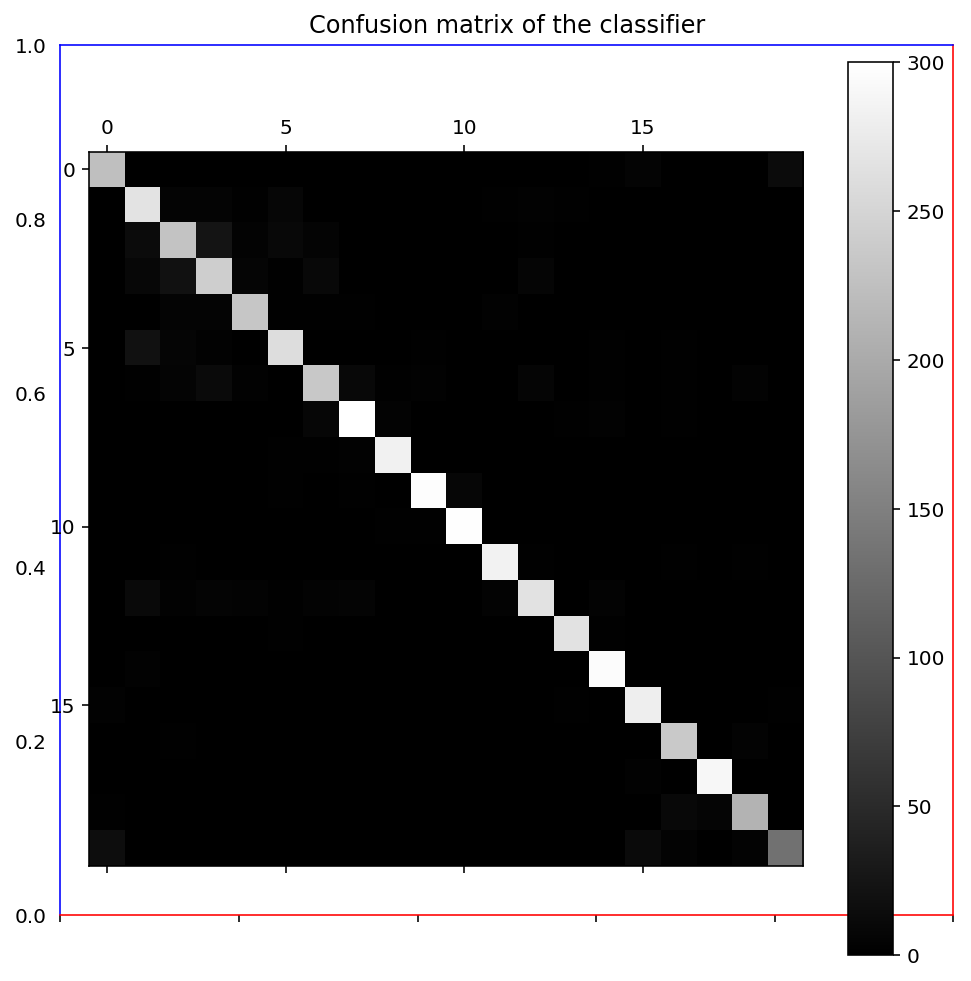

In [62]:
# 可视化混淆矩阵
plt.figure(figsize=(8, 8), dpi=144)
plt.title('Confusion matrix of the classifier')
ax = plt.gca()          #获取坐标轴（默认四个）                       
ax.spines['right'].set_color('red')            
ax.spines['top'].set_color('blue')
ax.spines['bottom'].set_color('red') #获取底部的轴
ax.spines['left'].set_color('blue')
#ax.xaxis.set_ticks_position('none') #不要X轴刻度
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([]) #不要X轴标签
#ax.set_yticklabels([])
plt.matshow(cm, fignum=1, cmap='gray') #矩阵可视化函数，函数传入的数值大小不同，绘图颜色也不相同。cmap代表一种颜色映射方式。
plt.colorbar() #colorbar()获取显示渐变条